# Speed Dating Analysis

## Who are the participants?

The dataset was compiled by Columbia Business School professors.
Data was gathered from participants in experimental speed dating events from 2002-2004. 

In [1]:
# Import useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "iframe_connected"

pd.options.display.max_columns = None

In [2]:
# Read the file

print("Loading dataset...")
df = pd.read_csv("Speed_Dating.csv", encoding = 'ISO-8859-1')
print("...Done.")
print()
df.head()

Loading dataset...
...Done.



,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

## Exploring the dataset

In [3]:
# Basics statistics

print("Number of rows : {}".format(df.shape[0]))
print()

print("Number of columns : {}".format(df.shape[1]))
print()

print("Basics statistics: ")
df_desc = df.describe(include='all')
display(df_desc)
print()

print("Percentage of missing values: ")
print()
display(100*df.isnull().sum()/df.shape[0])


Number of rows : 8378

Number of columns : 195

Basics statistics: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


Percentage of missing values: 



iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
Length: 195, dtype: float64

### Nomber of participants

In [4]:
df['iid'].nunique()

551

In [5]:
d = df.groupby('gender')['iid'].nunique()
d

gender
0    274
1    277
Name: iid, dtype: int64

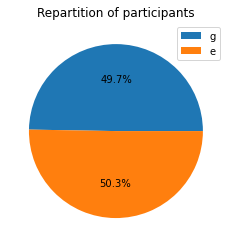

In [6]:
plt.pie(d, autopct='%1.1f%%')
plt.title("Repartition of participants")
plt.legend('gender')
plt.show()

In [7]:
fig = px.pie(df, d,title="Repartition of participants")
fig.show()

## Exploring participant profiles

### By age

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Age Distribution')

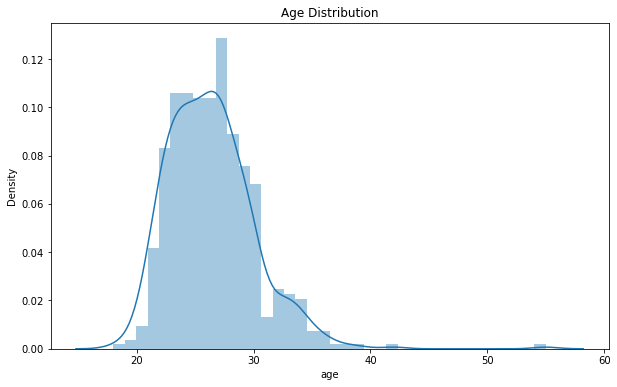

In [8]:
#Visualisation of age distribution

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.distplot(df.groupby("iid")['age'].mean())
plt.title('Age Distribution')

In [9]:
fig = px.pie(df, "age",title="Repartition of age")
fig.show()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age'>

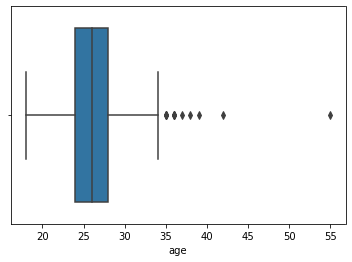

In [10]:
sns.boxplot(df.groupby("iid")['age'].mean())

In [11]:
df.groupby("iid")['age'].mean().mean()

26.359116022099446

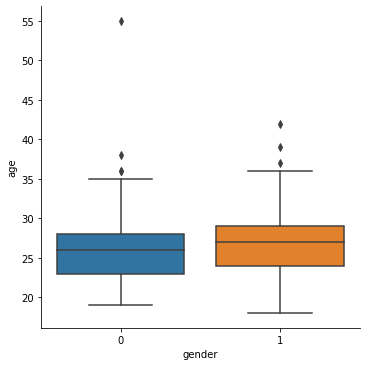

In [12]:
sns.catplot(x=(df.groupby("iid")['gender'].mean()), y=(df.groupby("iid")['age'].mean()), data= df, kind="box")

In [13]:
df.groupby("gender")['age'].mean()

gender
0    26.105851
1    26.609270
Name: age, dtype: float64

### By studies

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Field of study Distribution')

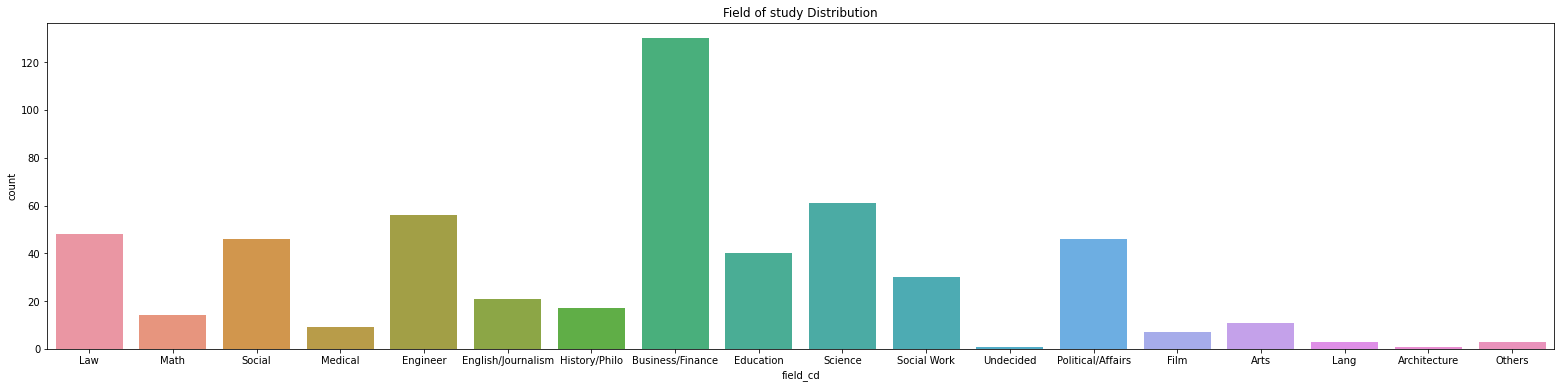

In [14]:
field_cd = ['Law','Math','Social','Medical','Engineer','English/Journalism','History/Philo',
            'Business/Finance','Education','Science','Social Work','Undecided','Political/Affairs',
            'Film','Arts','Lang','Architecture','Others']

fig, ax = plt.subplots(figsize=(27,6))
ax = sns.countplot(df.groupby("iid")['field_cd'].mean()).set(xticklabels=field_cd)
plt.title('Field of study Distribution')

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Field of study Distribution by gender')

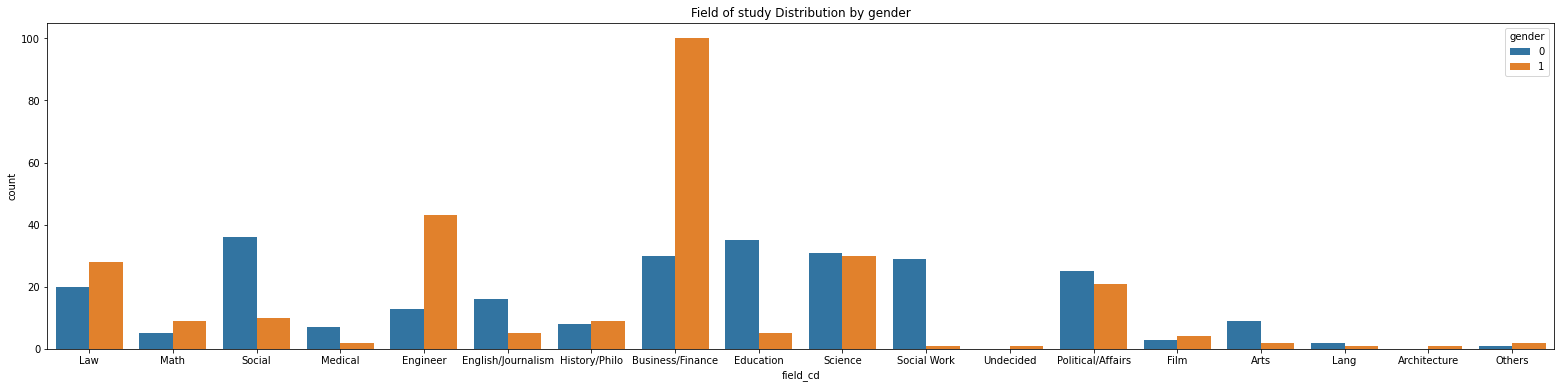

In [15]:
field_cd = ['Law','Math','Social','Medical','Engineer','English/Journalism','History/Philo',
            'Business/Finance','Education','Science','Social Work','Undecided','Political/Affairs',
            'Film','Arts','Lang','Architecture','Others']

fig, ax = plt.subplots(figsize=(27,6))
ax = sns.countplot(df.groupby("iid")['field_cd'].mean(),hue=df.groupby('iid')['gender'].mean(),data=df).set(xticklabels=field_cd)
plt.title('Field of study Distribution by gender')

### By career

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Career Distribution')

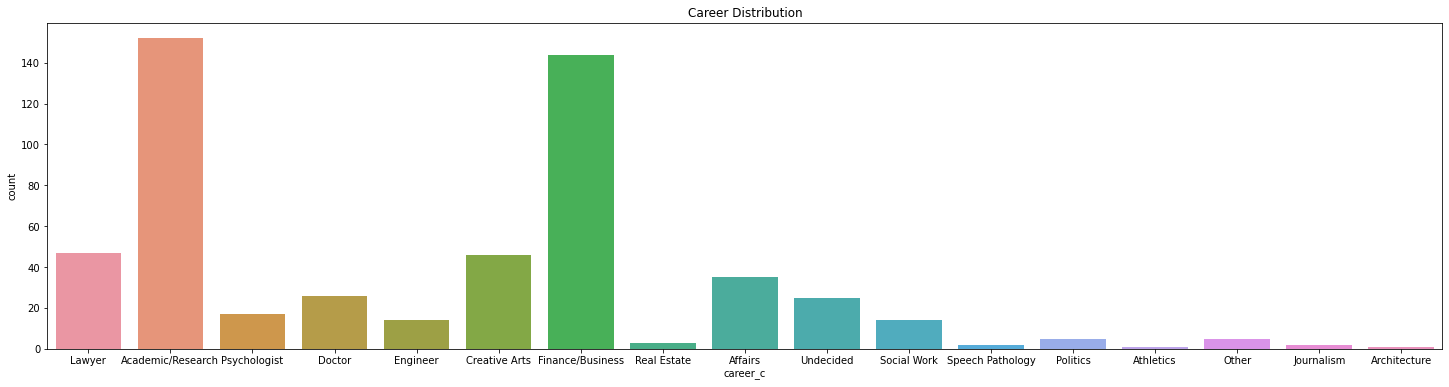

In [16]:
career = ['Lawyer','Academic/Research','Psychologist','Doctor','Engineer','Creative Arts',
          'Finance/Business','Real Estate','Affairs','Undecided','Social Work','Speech Pathology',
          'Politics','Athletics','Other','Journalism','Architecture']

fig, ax = plt.subplots(figsize=(25,6))
ax = sns.countplot(df.groupby("iid")['career_c'].mean()).set(xticklabels=career)
plt.title('Career Distribution')

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Career Distribution by gender')

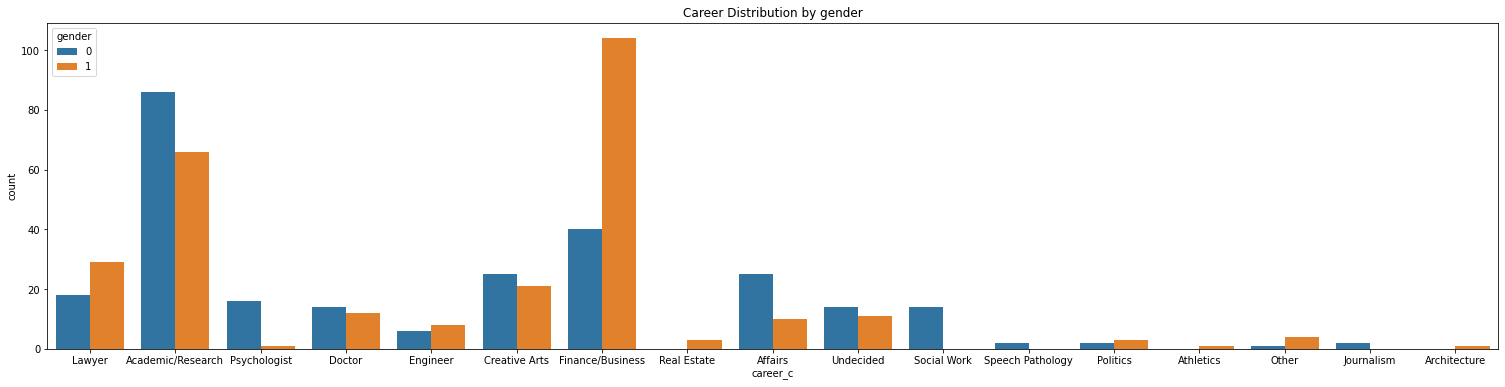

In [17]:
career = ['Lawyer','Academic/Research','Psychologist','Doctor','Engineer','Creative Arts',
          'Finance/Business','Real Estate','Affairs','Undecided','Social Work','Speech Pathology',
          'Politics','Athletics','Other','Journalism','Architecture']

fig, ax = plt.subplots(figsize=(26,6))
ax = sns.countplot(df.groupby("iid")['career_c'].mean(),hue=df.groupby('iid')['gender'].mean(),data=df).set(xticklabels=career)
plt.title('Career Distribution by gender')

### By frequency of date

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Frequency of date')

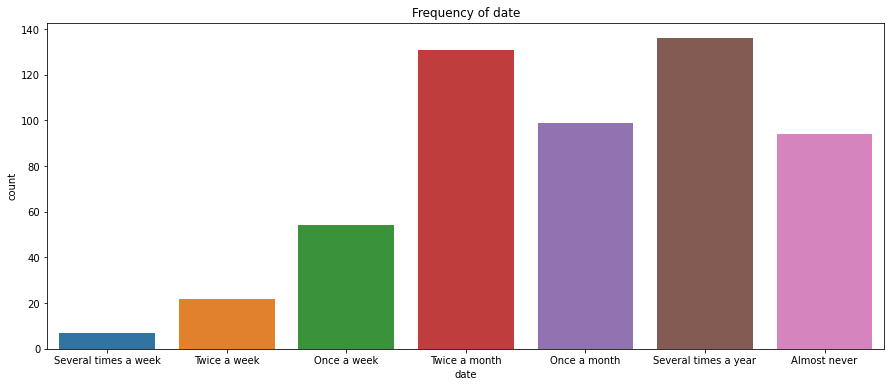

In [18]:
# frequency of date
date=['Several times a week','Twice a week','Once a week','Twice a month','Once a month','Several times a year','Almost never'] 

fig, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(df.groupby('iid')['date'].mean()).set(xticklabels=date)
plt.title('Frequency of date')


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Frequency of date by gender')

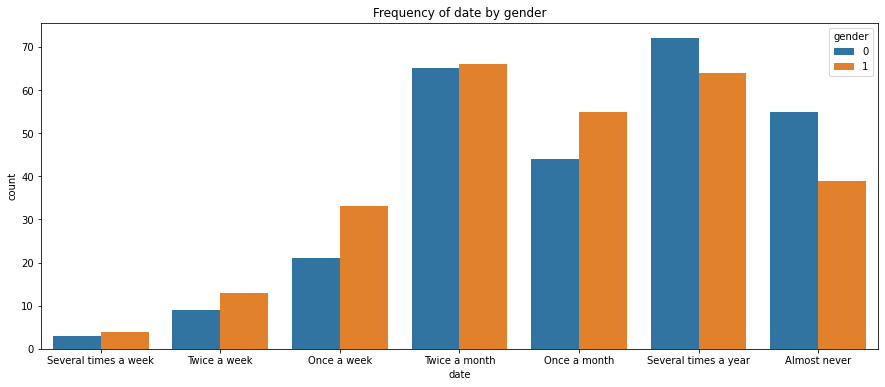

In [19]:
date=['Several times a week','Twice a week','Once a week','Twice a month','Once a month','Several times a year','Almost never'] 

fig, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(df.groupby('iid')['date'].mean(),hue=df.groupby('iid')['gender'].mean(),data=df).set(xticklabels=date)
plt.title('Frequency of date by gender')

### By frequency of go out

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Frequency of go out')

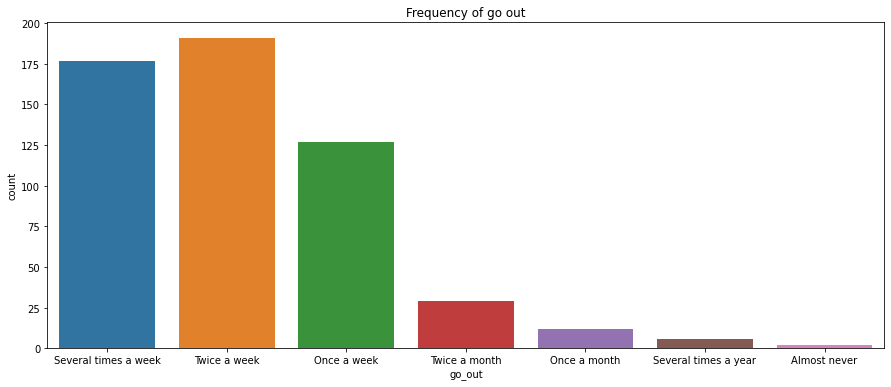

In [20]:
# frequency of go out
go_out=['Several times a week','Twice a week','Once a week','Twice a month','Once a month','Several times a year','Almost never'] 

fig, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(df.groupby('iid')['go_out'].mean()).set(xticklabels=go_out)
plt.title('Frequency of go out')

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Frequency of go out by gender')

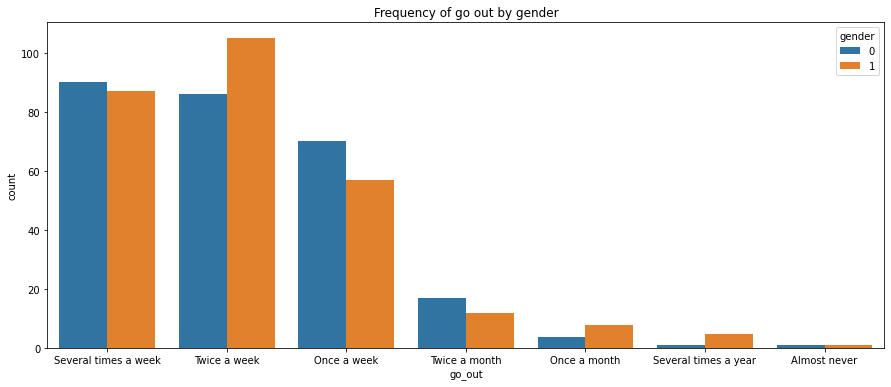

In [21]:
go_out=['Several times a week','Twice a week','Once a week','Twice a month','Once a month','Several times a year','Almost never'] 

fig, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(df.groupby('iid')['go_out'].mean(),hue=df.groupby('iid')['gender'].mean(),data=df).set(xticklabels=go_out)
plt.title('Frequency of go out by gender')

### By reason to participate

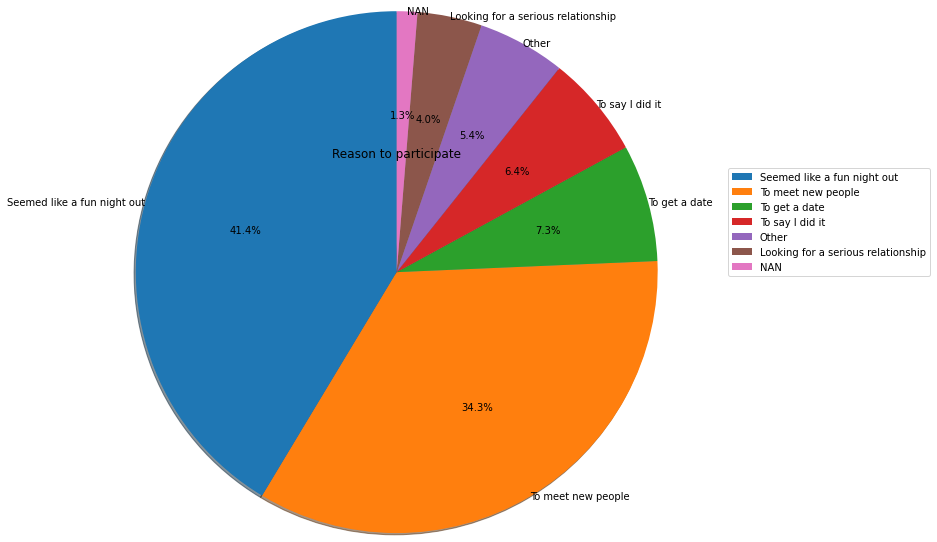

In [22]:
# Reason to participate

goal = df.groupby('iid')['goal'].mean().apply(lambda x:
                                        "Seemed like a fun night out" if x==1
                                        else "To meet new people" if x==2 
                                        else "To get a date" if x==3
                                        else "Looking for a serious relationship" if x== 4 
                                        else "To say I did it" if x== 5
                                        else "Other" if x==6
                                        else "NAN")

pie_chart_data = goal.value_counts()

plt.figure()
plt.pie(pie_chart_data.values,labels=pie_chart_data.index,
        labeldistance=1,
       autopct='%1.1f%%',
       shadow=True, 
       startangle=90,
       radius=3,
       )
plt.legend(bbox_to_anchor=(2, 1))
plt.title("Reason to participate")
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Reason to participate by gender')

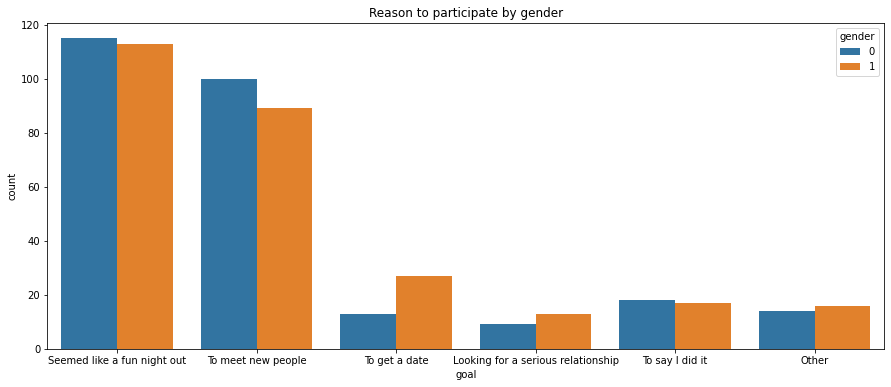

In [23]:
goal=['Seemed like a fun night out','To meet new people','To get a date','Looking for a serious relationship','To say I did it','Other']

fig, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(df.groupby('iid')['goal'].mean(),hue=df.groupby('iid')['gender'].mean(),data=df).set(xticklabels=goal)
plt.title('Reason to participate by gender')

### By activities

Text(0.5, 1.0, 'Participants activities')

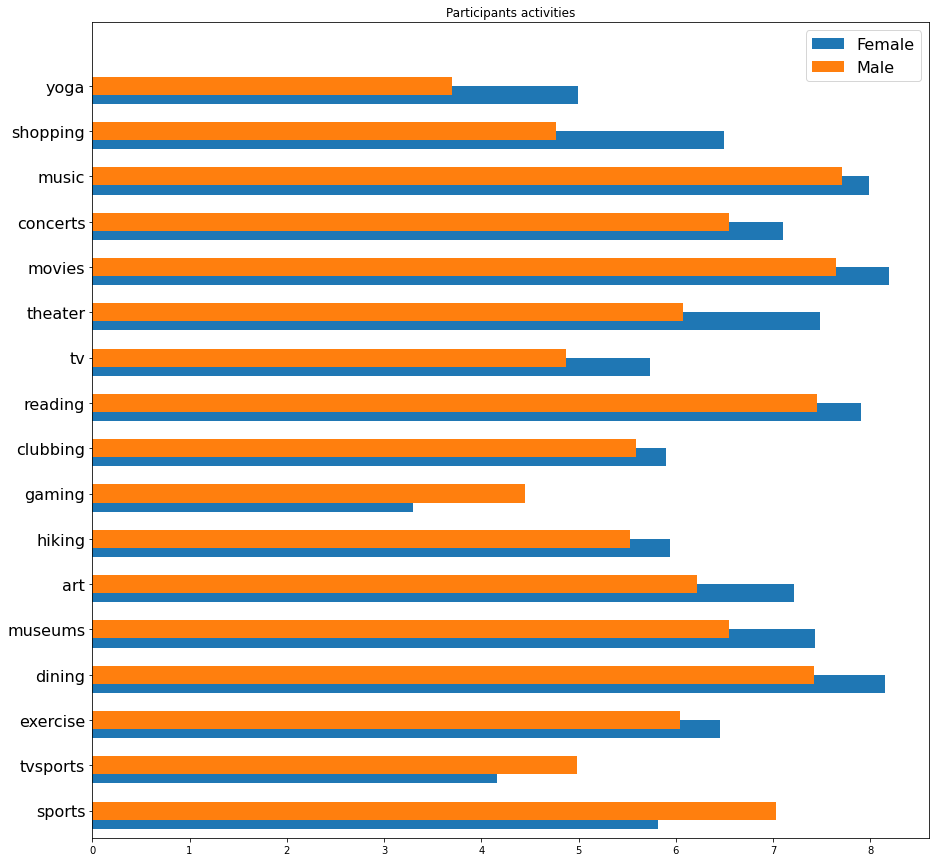

In [24]:
activities=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading',
                       'tv','theater','movies','concerts','music','shopping','yoga']
temp = df.groupby(['gender']).mean()[activities].values

plt.figure(figsize=(15,15))
plt.barh(np.arange(0,2*temp.shape[1],2)-0.2,temp[0,:],label='Female')
plt.barh(np.arange(0,2*temp.shape[1],2)+0.2,temp[1,:],label='Male')
plt.yticks(np.arange(0,2*temp.shape[1],2)+0.2,activities,fontsize=16)
plt.ylim(-1,2*temp.shape[1]+1)
plt.legend(loc=0,fontsize=16)
plt.title("Participants activities")

### By expectation

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'How happy participants expect to be')

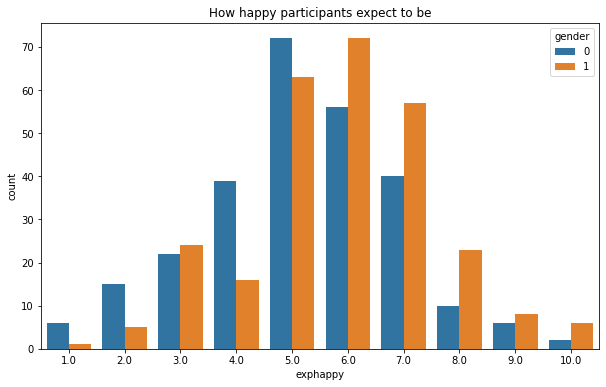

In [25]:
# how happy do they expect to be with the people meet 
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(df.groupby('iid')['exphappy'].mean(),hue=df.groupby('iid')['gender'].mean(),data=df)
plt.title('How happy participants expect to be')

### By research in the opposite sex

Text(0.5, 1.0, 'what participants look for in the opposite sex')

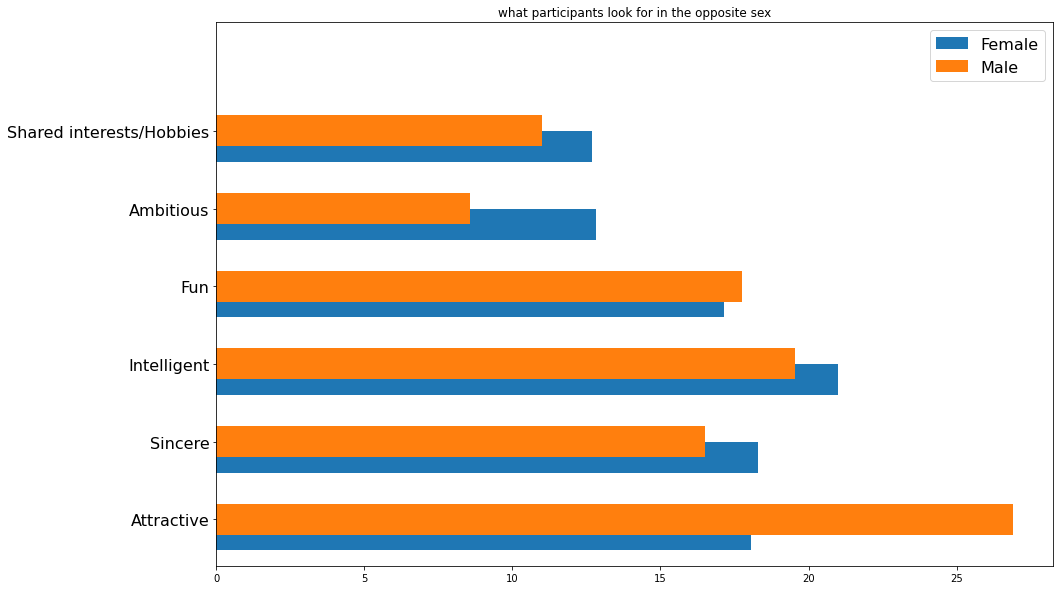

In [26]:
#what participants look for in the opposite sex

df.rename(columns = {'attr1_1': 'Attractive', 'sinc1_1': 'Sincere','intel1_1':'Intelligent','fun1_1':'Fun','amb1_1':'Ambitious','shar1_1':'Shared interests/Hobbies'},inplace=True)

search = ['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared interests/Hobbies']

temp = df.groupby(['gender']).mean()[search].values

plt.figure(figsize=(15,10))
plt.barh(np.arange(0,2*temp.shape[1],2)-0.2,temp[0,:],label='Female')
plt.barh(np.arange(0,2*temp.shape[1],2)+0.2,temp[1,:],label='Male')
plt.yticks(np.arange(0,2*temp.shape[1],2)+0.2,search,fontsize=16)
plt.ylim(-1,2*temp.shape[1]+1)
plt.legend(loc=0,fontsize=16)
plt.title("what participants look for in the opposite sex")

## Conclusion

This experimental speed dating was carried out on 551 participants including 274 women and 277 men. The majority of participants are between 20 and 30 years old with an average of 26 years old women and men combined.
The majority of men have studied business/finance while women have studied in more diverse fields like Social, Education and Science.
The majority of men have a career in finance/business while the majority of women in academia and research.
The majority of men report having date twice a month is almost equal with several times a year while women report more than several times a year and then twice a month
Men report going out twice a week followed by several times a week while women report almost equally going out first several times a week and then twice a week.
The majority of men and women report participating because it seemed like a fun evening.
The majority of men report having the following activities: music, movies, reading, dining and sports. 
The majority of women report the following activities: dining, movies, reading and music
Men expected to be happy to meet people with a score of 6/10 and women with a score of 5/10
It is clear that men seek attractiveness while women seek intelligence in the opposite sex.
After this brief data exploration on the profiles of the participants it appears that the typical profile:
-	From a woman is 26 years old who has studied social or science, who has a career in academics or research having date several times a year and goes out several times a week, she participates to spend a fun evening and who has for center of interest dining, movies, reading and music.
-	From a man aged 26 who has studied and a career in finance / business, who goes out twice a week and having date twice a month, he participates to spend a fun evening and who has for center of interest music, movies, reading, dining and sports.

To conclude, the profile of the men and women who participated are quite similar.
